# Regresión Lineal para el precio de la vivienda en India

#####  Datos extraídos de https://www.kaggle.com/himanshuntt/indian-housing-price

In [1]:
import pandas as pd
df = pd.read_csv('houseprice.csv', sep = ',')

In [71]:
df.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


Este proyecto trata un DataFrame con datos de
- Precios de viviendas 
- Área del salón
- Número de baños
- Número de habitaciones
- Espacio del terreno
- Edad de la casa
- Chimenea (1 --> Hay chimenea ; 2 --> No hay chimenea)

En primer lugar vemos que hay una variable cualitativa, la presencia o no de chimenea. Sería interesante ver gráficamente la diferencia de precio entre las casas que tienen chimenea y las que no.

Al ser un Dataset con muchas variables, no se puede obtener su visualización con un diagrama de dispersión.
Una solución puede ser comparar mediante dos Boxplots el precio para las casas con y sin chimenea.

### Alguna visualización:

In [72]:
#Creamos máscaras para obtener dos DataFrames, uno para las casas con chimenea y otro para las que no tienen:

df_Fireplace = df['Fireplace'] == 1
df_NoFireplace = df['Fireplace'] == 0

In [73]:
#DataFrame para las casas sin chimenea:

df[df_NoFireplace].head() 

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
5,1.456,2.0,3,0.98,10,0,20.6512
6,0.960,1.5,2,0.01,12,0,5.0709
7,1.464,1.0,2,0.11,87,0,10.8794
8,1.216,1.0,2,0.61,101,0,6.8353


In [74]:
##DataFrame para las casas conn chimenea

df[df_Fireplace].head() 

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470
10,2.270,2.5,3,4.05,9,1,30.9808


In [75]:
#Para crear los gráficos importamos matplotlib

import matplotlib
from matplotlib import pyplot as plt


Boxplot para las casas sin chimenea:

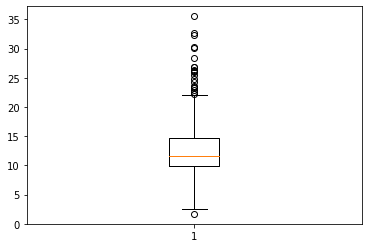

In [76]:
matplotlib.pyplot.boxplot(df[df_NoFireplace]['Price']);

Boxplot para las casas con chimenea:

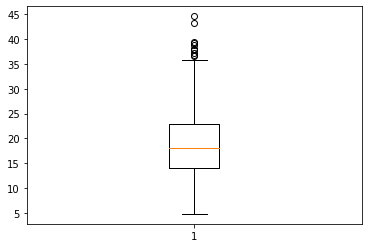

In [77]:
matplotlib.pyplot.boxplot(df[df_Fireplace]['Price']);

Vemos que la mediana (la línea amarilla) del precio para las casas sin chimenea ronda el 11, mientras que la mediana de las casas con chimenea ronda el 18.

Esto hace pensar que introducir la variable "Chimenea" como cualitativa en un modelo de regresión lineal puede ser apropiado.

### Modelo de Regresión Lineal: 

In [78]:
import numpy as np
from sklearn import linear_model

In [79]:
regresion = linear_model.LinearRegression()
regresion.fit(df[['Living Area', 'Bathrooms', 'Bedrooms', 'Lot Size', 'Age', 'Fireplace']], df.Price)

LinearRegression()

In [80]:
regresion.coef_

array([ 6.66716768,  1.65120324, -0.51715273,  0.16333172, -0.0218611 ,
        1.02069293])

In [81]:
regresion.intercept_

2.7303700265059163

Se obtiene el siguiente modelo:

    Price = 2.73 + 6.67 x Living Area + 1.65 x Bathrooms - 0.52 x Bedrooms + 0.16 x Lot Size - 0.02 x Age + 1.02 x Fireplace

Si queremos comprobar los p-valores debemos acudir al paquete statsmodels y consultarlos en la regresión que se obtiene ahí:

In [96]:
import statsmodels.formula.api as smf

#Quitamos los espacios de los nombres de las columnas

df = df.rename(columns = {'Living Area':'LivingArea', 'Lot Size':'LotSize'})

regr = smf.ols(formula = 'Price ~ LivingArea + Bathrooms + Bedrooms + LotSize + Age + Fireplace', data = df).fit()

In [97]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     317.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.39e-231
Time:                        19:07:00   Log-Likelihood:                -2942.0
No. Observations:                1047   AIC:                             5898.
Df Residuals:                    1040   BIC:                             5933.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7304      0.609      4.485      0.000       1.536       3.925
LivingArea     6.6672      0.342     19.487      0.000       5.996       7.339
Bathrooms      1.6512      0.307      5.371      0.000       1.048       2.255
Bedrooms      -0.5172      0.226     -2.287      0.022      -0.961      -0.073
LotSize        0.1633      0.164      0.994      0.320      -0.159       0.486
Age           -0.0219      0.004     -5.345      0.000      -0.030      -0.014
Fireplace      1.0207      0.295      3.463      0.001       0.442       1.599
==============================================================================
Omnibus:                      199.393   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.303
Skew:                           0.851   Prob(JB):                    2.23e-175
Kurtosis:                       6.942   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El p-valor asociado a la variable "LotSize" no es menor que 0,05, por lo que se puede decir que no es estadísticamente significativo.

Si hacemos otra regresión sin tener en cuenta esa variable:

In [98]:
regr2 = smf.ols(formula = 'Price ~ LivingArea + Bathrooms + Bedrooms + Age + Fireplace', data = df).fit()

In [99]:
regr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     380.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.30e-232
Time:                        19:13:28   Log-Likelihood:                -2942.5
No. Observations:                1047   AIC:                             5897.
Df Residuals:                    1041   BIC:                             5927.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7467      0.609      4.514      0.000       1.553       3.941
LivingArea     6.7211      0.338     19.896      0.000       6.058       7.384
Bathrooms      1.6402      0.307      5.338      0.000       1.037       2.243
Bedrooms      -0.5167      0.226     -2.285      0.023      -0.961      -0.073
Age           -0.0217      0.004     -5.304      0.000      -0.030      -0.014
Fireplace      1.0100      0.295      3.429      0.001       0.432       1.588
==============================================================================
Omnibus:                      199.519   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.827
Skew:                           0.854   Prob(JB):                    2.09e-174
Kurtosis:                       6.927   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se obtiene otra fórmula con coeficientes muy parecidos a los anteriores:

    Price = 2.75 + 6.72 x Living Area + 1.64 x Bathrooms - 0.52 x Bedrooms - 0.02 x Age + 1.01 x Fireplace

Que se puede descomponer en dos fórmulas:
    
    Cuando hay chimenea:
        
        Price = 3.76 + 6.72 x Living Area + 1.64 x Bathrooms - 0.52 x Bedrooms - 0.02 x Age 
        
    Cuando no hay chimenea:
        
        Price = 2.75 + 6.72 x Living Area + 1.64 x Bathrooms - 0.52 x Bedrooms - 0.02 x Age 